In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.groupby('left').mean()

C:\Users\rayan\AppData\Local\Temp\ipykernel_6776\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot: xlabel='average_montly_hours'>

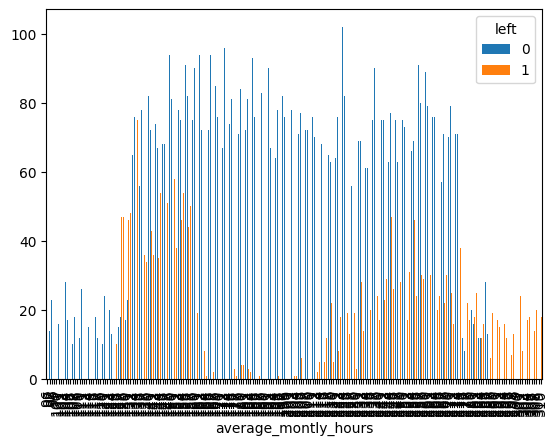

In [5]:
pd.crosstab(df.average_montly_hours, df.left).plot(kind="bar")

In [6]:
subdf= df[['satisfaction_level','average_montly_hours','Work_accident','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary
0,0.38,157,0,0,low
1,0.80,262,0,0,medium
2,0.11,272,0,0,medium
3,0.72,223,0,0,low
4,0.37,159,0,0,low


In [7]:
dummy= pd.get_dummies(df.salary)
dummy

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [8]:
dummy.drop(columns=['medium'],inplace=True)
dummy

,high,low
0,0,1
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
14994,0,1
14995,0,1
14996,0,1
14997,0,1


In [9]:
subdf.drop(columns=['salary'],inplace=True)
subdf

C:\Users\rayan\AppData\Local\Temp\ipykernel_6776\1417062799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf.drop(columns=['salary'],inplace=True)


,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years
0,0.38,157,0,0
1,0.80,262,0,0
2,0.11,272,0,0
3,0.72,223,0,0
4,0.37,159,0,0
...,...,...,...,...
14994,0.40,151,0,0
14995,0.37,160,0,0
14996,0.37,143,0,0
14997,0.11,280,0,0


In [10]:
Fdf=pd.concat([subdf,dummy],axis='columns')
Fdf

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,high,low
0,0.38,157,0,0,0,1
1,0.80,262,0,0,0,0
2,0.11,272,0,0,0,0
3,0.72,223,0,0,0,1
4,0.37,159,0,0,0,1
...,...,...,...,...,...,...
14994,0.40,151,0,0,0,1
14995,0.37,160,0,0,0,1
14996,0.37,143,0,0,0,1
14997,0.11,280,0,0,0,1


In [11]:
X= Fdf
X.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,high,low
0,0.38,157,0,0,0,1
1,0.80,262,0,0,0,0
2,0.11,272,0,0,0,0
3,0.72,223,0,0,0,1
4,0.37,159,0,0,0,1


In [12]:
y=df.left
y.shape

(14999,)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [16]:
model.fit(X_train,y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [18]:
model.score(X_test, y_test)

0.7648888888888888

In [19]:
model.predict([[0.11,260,0,1,0,1]])

c:\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [20]:
y_predicted= model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
cm

array([[3158,  218],
       [ 840,  284]], dtype=int64)

Text(33.22222222222222, 0.5, 'actual')

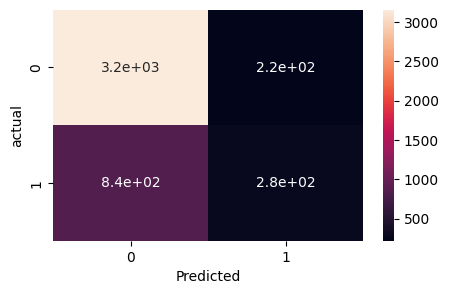

In [22]:
import seaborn as sn
plt.figure(figsize = (5,3))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('actual')